# Nonlinear Equations

We want to find a root of the nonlinear function $f$ using different methods.

1. Bisection method
2. Newton method
3. Chord method
4. Secant method
5. Fixed point iterations





In [1]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
import sympy as sym


$f(t) = \frac{t}{8}(63t^4-70t^2+15)$

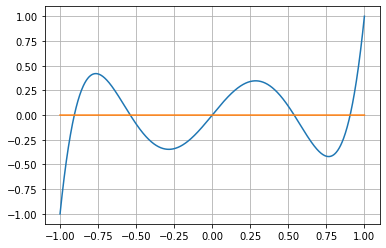

In [2]:
t = sym.symbols('t')

f_sym = t/8. * (63.*t**4 - 70.*t**2. +15.) # Legendre polynomial of order 5
f_prime_sym = sym.diff(f_sym,t)

f = sym.lambdify(t, f_sym, 'numpy')
f_prime = sym.lambdify(t,f_prime_sym, 'numpy')

# Let's plot
n = 1025

x = linspace(-1,1,n)
c = zeros_like(x)

_ = plot(x,f(x))
_ = plot(x,c)
_ = grid()


In [3]:
# Initial data for the variuos algorithms

# interval in which we seek the solution 
a = 0.7
b = 1.

# initial points
x0 = (a+b)/2.0
x00 = b


In [4]:
# stopping criteria
eps = 1e-10
n_max = 1000

## Bisection method

$$
x^k = \frac{a^k+b^k}{2}
$$
```
                   if (f(a_k) * f(x_k)) < 0:
                      b_k1 = x_k
                      a_k1 = a_k
                   else:
                      a_k1 = x_k
                      b_k1 = b_k
```

32
0.9061798459501006
7.857261621871514e-11
CPU times: user 1.31 ms, sys: 356 µs, total: 1.67 ms
Wall time: 1.36 ms


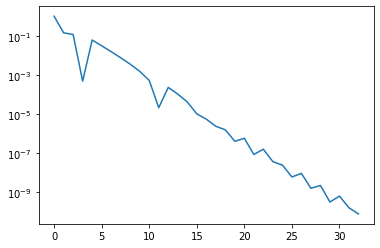

In [5]:
def bisect(f,a,b,eps,n_max):
    assert f(a)*f(b)<0
    a_new = a
    b_new = b
    x = mean([a,b])
    err = eps + 1.
    errors = [err]
    it = 0
    while (err > eps and it < n_max):
        if ( f(a_new) * f(x) < 0 ):
            # root in (a_new,x)
            b_new = x
        else:
            # root in (x,b_new)
            a_new = x
        
        x_new = mean([a_new,b_new])
        
        #err = 0.5 *(b_new -a_new)
        err = abs(f(x_new))
        #err = abs(x-x_new)
        
        errors.append(err)
        x = x_new
        it += 1
    
    print(it)
    print(x)
    print(err)
    return errors
              
%time errors_bisect = bisect(f,a,b,eps,n_max)
semilogy(errors_bisect)


             
        

In [6]:
# is the number of iterations coherent with the theoretical estimation?

In order to find out other methods for solving non-linear equations, let's compute the Taylor's series of $f(x^k)$ up to the first order 

$$
f(x^k) \simeq f(x^k) + (x-x^k)f^{\prime}(x^k)
$$
which suggests the following iterative scheme
$$
x^{k+1} = x^k - \frac{f(x^k)}{f^{\prime}(x^k)}
$$

The following methods are obtained applying the above scheme where

$$
f^{\prime}(x^k) \approx q^k
$$

## Newton's method
$$
q^k = f^{\prime}(x^k)
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

0.9061798459386647
5.633945684709343e-15
5
CPU times: user 605 µs, sys: 168 µs, total: 773 µs
Wall time: 467 µs


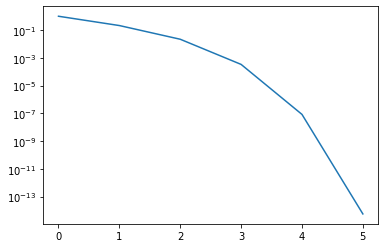

In [7]:
def newton(f,f_prime,x0,eps,n_max):
    err = abs(f(x0))
    errors = [err]
    it = 0
    x = x0
    while (err > eps and it < n_max):
        qk = f_prime(x)
        if abs(qk) < 1e-12:
            raise RuntimeError("f_prime(x) is close to zero")
        x_new = x - f(x)/qk
        err = abs(f(x_new))
        x = x_new
        errors.append(err)
        it += 1
    
    print(x)
    print(err)
    print(it)
    return errors

%time errors_newton = newton(f,f_prime,1.0,eps,n_max)
semilogy(errors_newton)

## Chord method

$$
q^k \equiv q = \frac{f(b)-f(a)}{b-a}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q}
$$

0.9061798459159386
6.730749291250504e-11
30
CPU times: user 813 µs, sys: 227 µs, total: 1.04 ms
Wall time: 648 µs


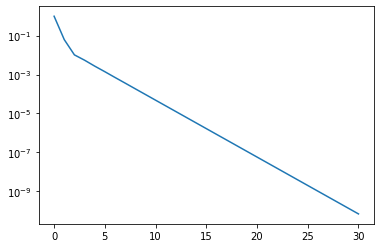

In [8]:
def chord(f,a,b,x0,eps,n_max):
    q = (f(b) - f(a))/(b-a)
    err = eps +1.
    errors = [err]
    it = 0
    x = x0
    while (err > eps and it <n_max):
        x_new = x - f(x)/q
        err = abs(x_new - x)
        errors.append(err)
        x = x_new
        it += 1
    
    print(x)
    print(err)
    print(it)
    return errors

%time errors_chord = chord (f,a,b,x0,eps,n_max)
semilogy(errors_chord)

## Secant method

$$
q^k = \frac{f(x^k)-f(x^{k-1})}{x^k - x^{k-1}}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

Note that this algorithm requirs **two** initial points

0.906179845938664
6.433087396118253e-11
7
CPU times: user 393 µs, sys: 0 ns, total: 393 µs
Wall time: 284 µs


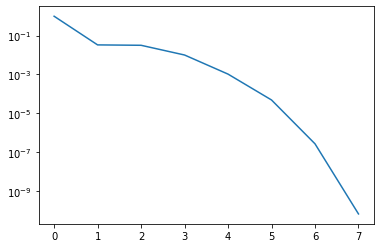

In [9]:
def secant(f,x0,x00,eps,n_max):
    err = eps +1.
    errors = [err]
    
    it = 0
    
    xk = x0
    xkk = x00
    while (err > eps and it < n_max):
        qk = (f(xk) - f(xkk))/(xk - xkk)
        x_new = xk - f(xk)/qk
        err = abs (x_new - xk)
        xkk = xk
        xk = x_new
        it += 1
        errors.append(err)
        
    print(xk)
    print(err)
    print(it)
    return errors
    
%time errors_secant = secant(f,x0,x00,eps,n_max)
semilogy(errors_secant)

## Fixed point iterations

$$
f(x)=0 \to x-\phi(x)=0
$$

$$
x^{k+1} = \phi(x^k)
$$

Let's remember that $f = \frac{t}{8}(63t^4-70t^2+15)$, since we are interested in the last non trivial root we can focus on looking at the roots of $f1 = 63t^4-70t^2+15$.

Then we can rewrite $f1(t) = 0$ as $t - \phi(t) = 0$. We tried different ways to write such an expression:

Dividing by $70t$:
$$
\frac{63}{70}t^3 -t +\frac{15}{70t} = 0 \to \phi_1 = \frac{63}{70}t^3 +\frac{15}{70t}
$$

Dividing by $63t^3$:
$$
t - \frac{70}{63t} + \frac{15}{63t^3} = 0 \to \phi_2 = + \frac{70}{63t} - \frac{15}{63t^3}
$$

Mulyplying by $\frac{t}{15}$:
$$
\frac{63}{15}t^5 - \frac{70}{15}t^3 + t = 0 \to \phi_3 = - \frac{63}{15}t^5 + \frac{70}{15}t^3
$$

Writing $f1$ as:
$$
70t^2 = 63t^4+15 \to t = \sqrt{\frac{63t^4+15}{70}} \to \phi_4 = \sqrt{\frac{63t^4+15}{70}} 
$$

phi1'(a): 2.199314305500594
phi2'(a): 0.3541925718704587
phi3'(a): 4.469631249999997
phi4'(a): 1.5855869999410042
0.9061798459511612
5.5035753732113335e-11
18
CPU times: user 154 µs, sys: 43 µs, total: 197 µs
Wall time: 153 µs


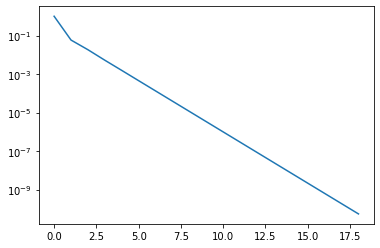

In [10]:
phi1 = 63./70.*t**3 + 15./(70.*t)
phi2 = 70./(63.*t) - 15./(63*t**3)
phi3 = 70.0/15.0*t**3 - 63.0/15.0*t**5
phi4 = sym.sqrt((63.*t**4 + 15.0)/70.)

phi1_pri = sym.diff(phi1,t)
phi2_pri = sym.diff(phi2,t)
phi3_pri = sym.diff(phi3,t)
phi4_pri = sym.diff(phi4,t)

phi1 = sym.lambdify(t, phi1, 'numpy')
phi2 = sym.lambdify(t, phi2, 'numpy')
phi3 = sym.lambdify(t, phi3, 'numpy')
phi4 = sym.lambdify(t, phi4, 'numpy')

phi1_pri = sym.lambdify(t, phi1_pri, 'numpy')
phi2_pri = sym.lambdify(t, phi2_pri, 'numpy')
phi3_pri = sym.lambdify(t, phi3_pri, 'numpy')
phi4_pri = sym.lambdify(t, phi4_pri, 'numpy')

x0 = 0.95

print("phi1'(a):",abs(phi1_pri(x0)))
print("phi2'(a):",abs(phi2_pri(x0)))
print("phi3'(a):",abs(phi3_pri(x0)))
print("phi4'(a):",abs(phi4_pri(x0)))

def fixed_point(phi,x0,eps,n_max):
    x = x0
    err = eps + 1.
    errors = [err]
    it = 0
    while (err > eps and it < n_max):
        x_new = phi (x)
        err = abs (x_new -x)
        x = x_new
        it += 1
        errors.append(err)
    
    print(x)
    print(err)
    print(it)
    return errors

%time errors_fixed = fixed_point(phi2,x0,eps,n_max)
semilogy(errors_fixed)

## Comparison

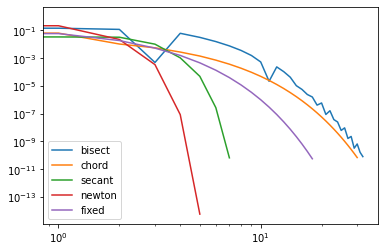

In [11]:
# plot the error convergence for the methods
loglog(errors_bisect, label='bisect')
loglog(errors_chord, label='chord')
loglog(errors_secant, label='secant')
loglog(errors_newton, label ='newton')
loglog(errors_fixed, label ='fixed')
_ = legend()

In [12]:
# Let's compare the scipy implementation of Newton's method with our..

In [13]:
import scipy.optimize as opt
%time opt.newton(f, 1.0, f_prime, tol = eps)

CPU times: user 363 µs, sys: 125 µs, total: 488 µs
Wall time: 496 µs


0.906179845938664